In [8]:
cd C:\Users\AI01477\OneDrive - Anthem\Documents\Claim Forms\Claim Forms\

C:\Users\AI01477\OneDrive - Anthem\Documents\Claim Forms\Claim Forms


In [9]:
import cv2
import os
import numpy as np
import pdf2image
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
import pdf2image

In [17]:
image_path=['21039CS2819Page_0.jpg','22032DL3173Page_0.jpg','22131DG5963Page_0.jpg']

In [18]:
plot_flag=True
save_output=True
os.environ['KMP_DUPLICATE_LIB_OK']='True'
out_folder='outs'
os.makedirs(out_folder,exist_ok=True)
Dict = { } # nested dictionary

In [19]:
def plot(image,cmap=None):
    plt.figure(figsize=(15,15))
    plt.imshow(image,cmap=cmap)

In [20]:
def getDisHours(index):
    result = reader.readtext(img[index], detail = 0)
    return result 

def getAddHours(index):
    result = reader.readtext(img[index], detail = 0)
    return result 

def getSRC(index):
    result = reader.readtext(img[index], detail = 0)
    return result 

def getServDate(index):
    result = reader.readtext(img[index], detail = 0)
    return result 

def getRevCode(index):
    result = reader.readtext(img[index], detail = 0)
    return result



def getServUnits(index):
    im=cv2.bitwise_not(img[index][:,100:])
    return reader.readtext(im, detail = 0)

def getTotalCharges(index):
    result = reader.readtext(img[index], detail = 0)
    return result

def getModifier(index):
    result=reader.readtext(img[index], detail=0)
    res=[]
    for i in result:
        if len(i)!=5:
            res.append(i)
    return res

def getHCPCCodes(index):
    result=reader.readtext(img[index], detail=0)
    res=[]
    for i in result:
        if len(i)==5:
            res.append(i)
    return res

def ProvAdd(index): 
    result = reader.readtext(img[index],detail =0)
    return " ".join(result)

def getDOB(index): 
    result = reader.readtext(img[index],detail =0)
    return result

def getName(index): 
    result = reader.readtext(img[index], detail = 0)
    return " ".join(result)

def getGender(index):
    result = reader.readtext(img[index], detail = 0)
    return result

def getOcc(index):
    temp = []
    for i in range(index[0],index[1],2):
        result = reader.readtext(img[i],detail =0)
        temp.append(result)
    return temp

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


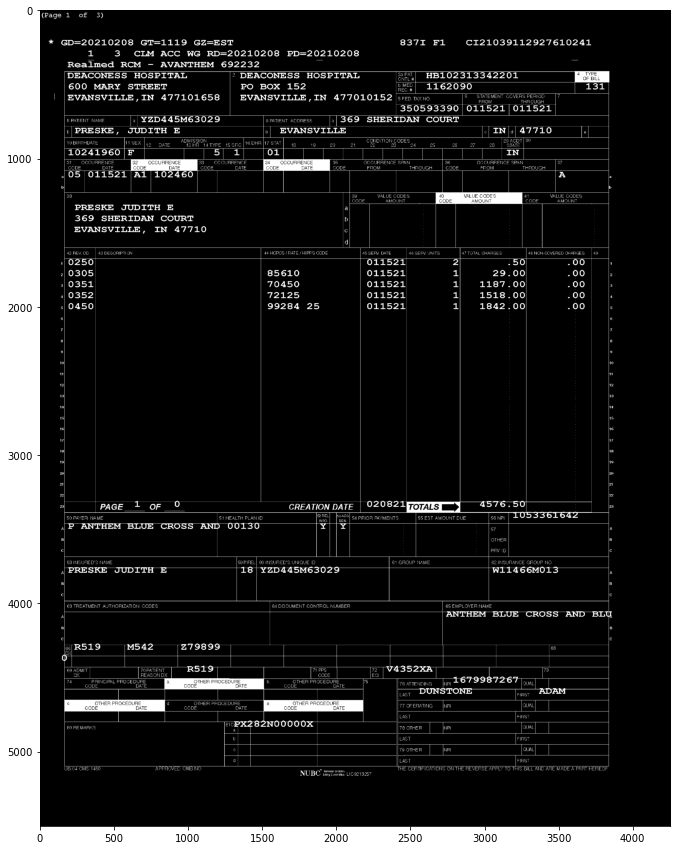

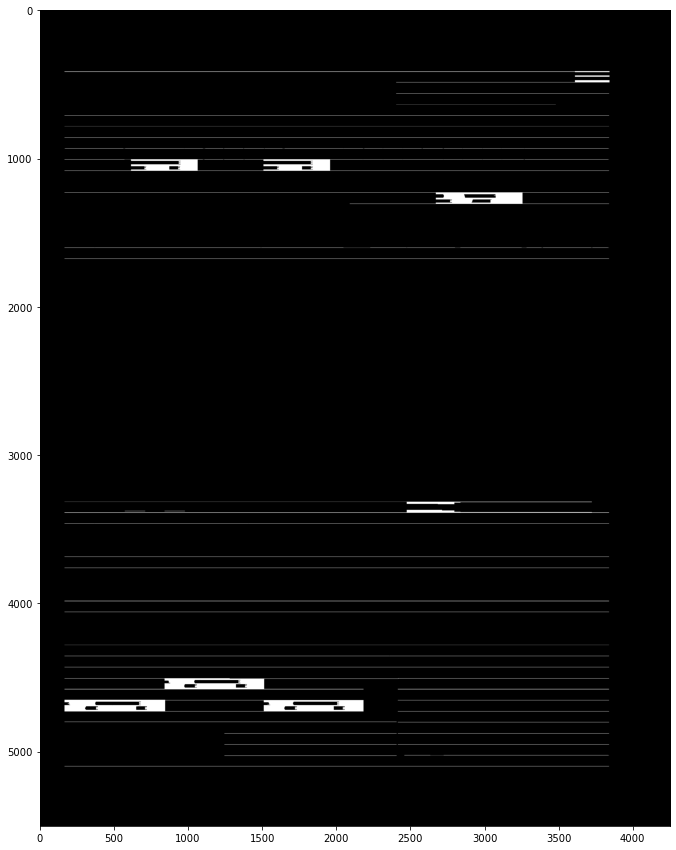

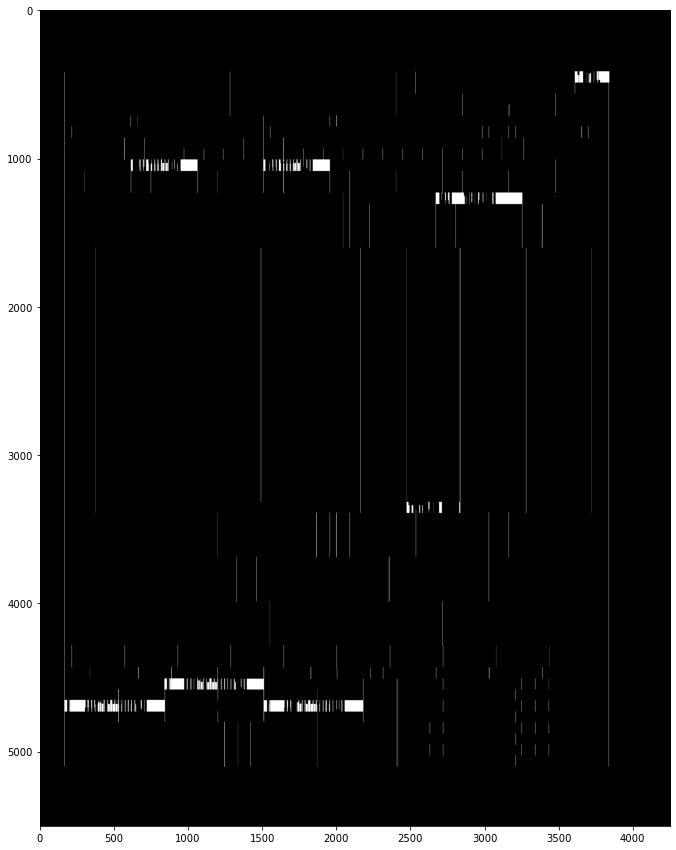

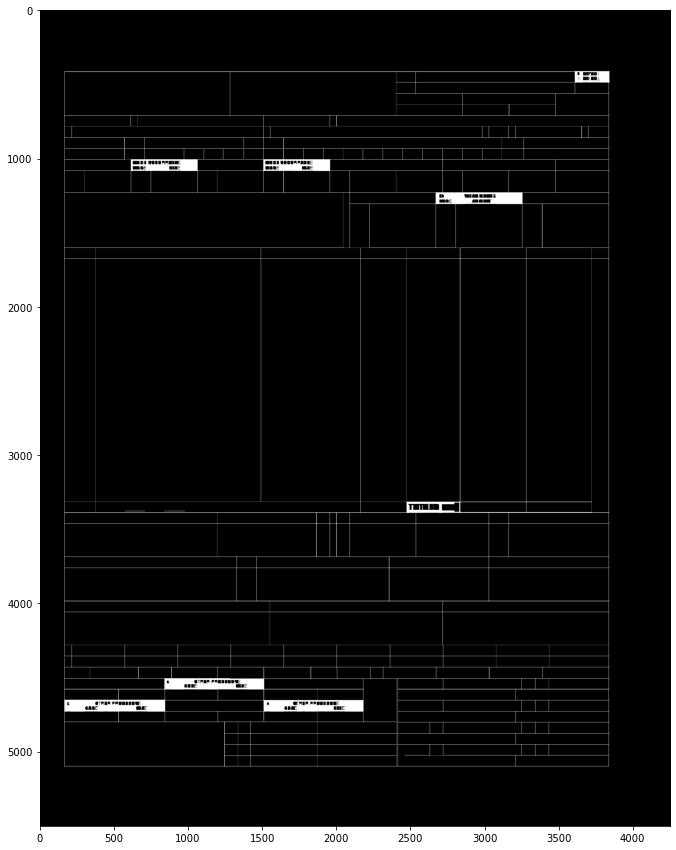

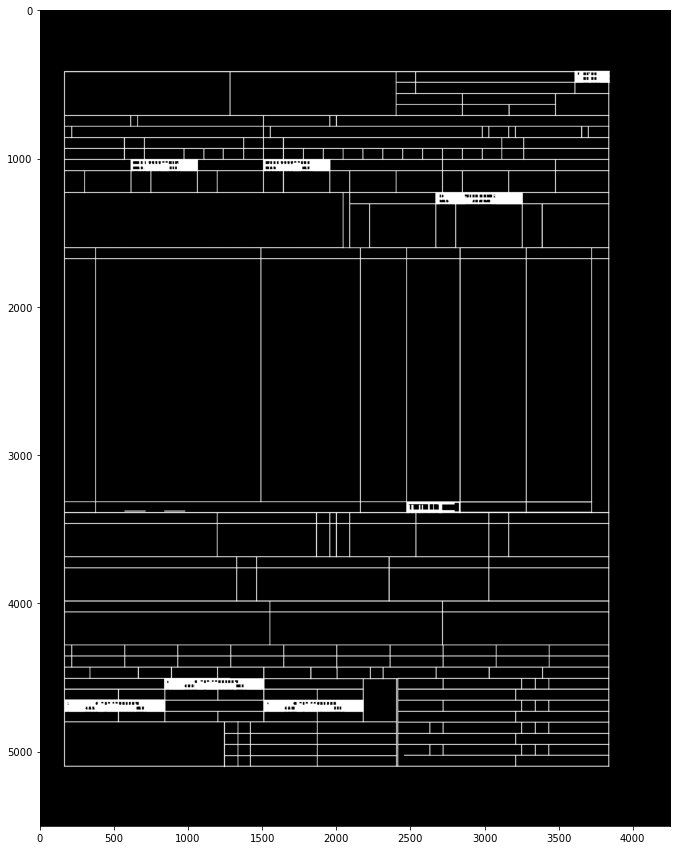

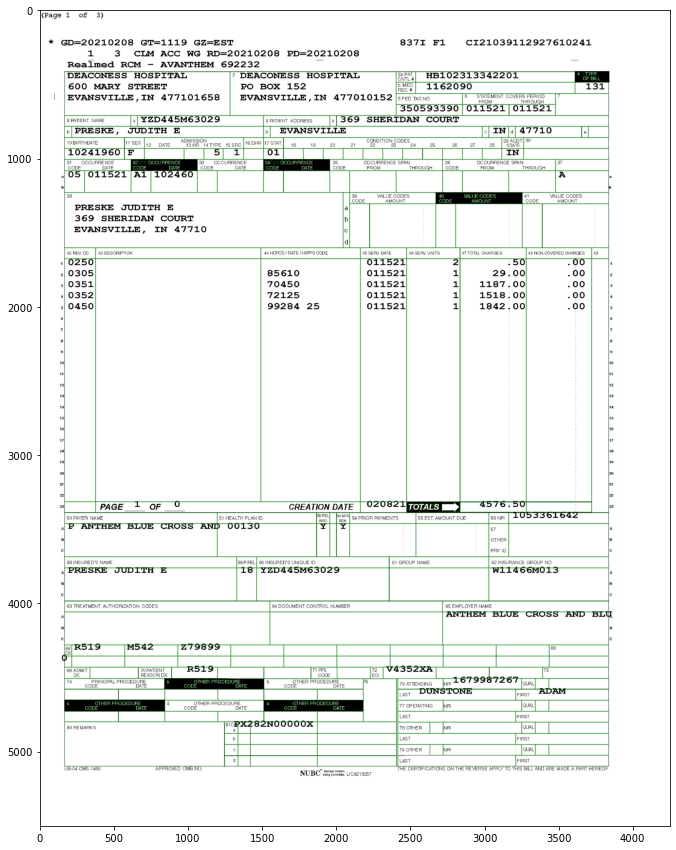

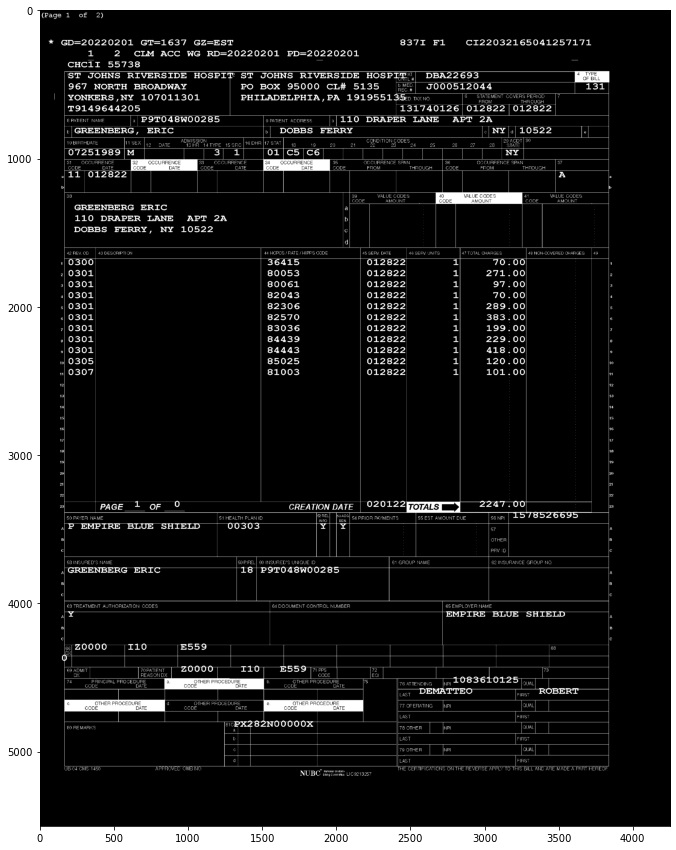

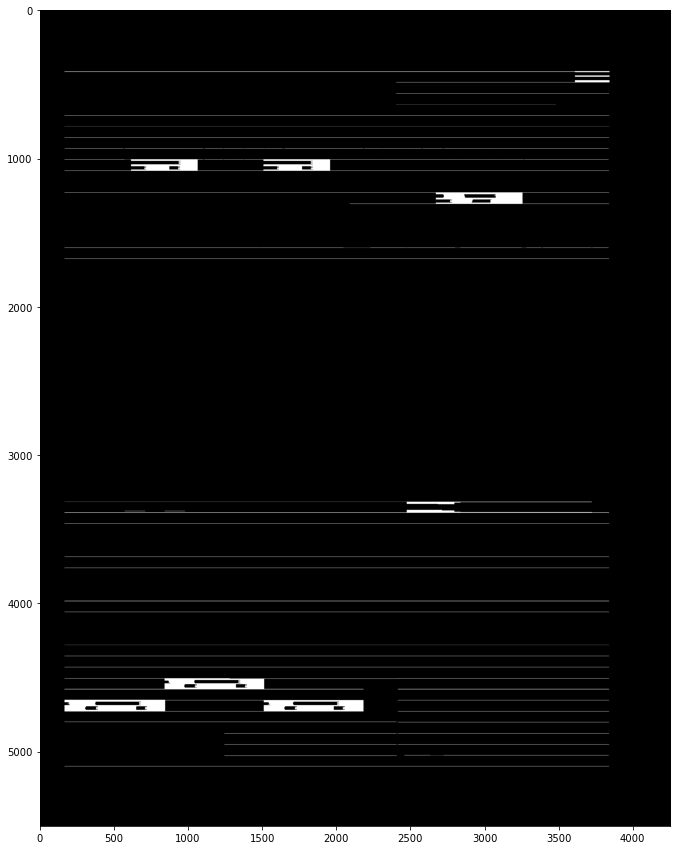

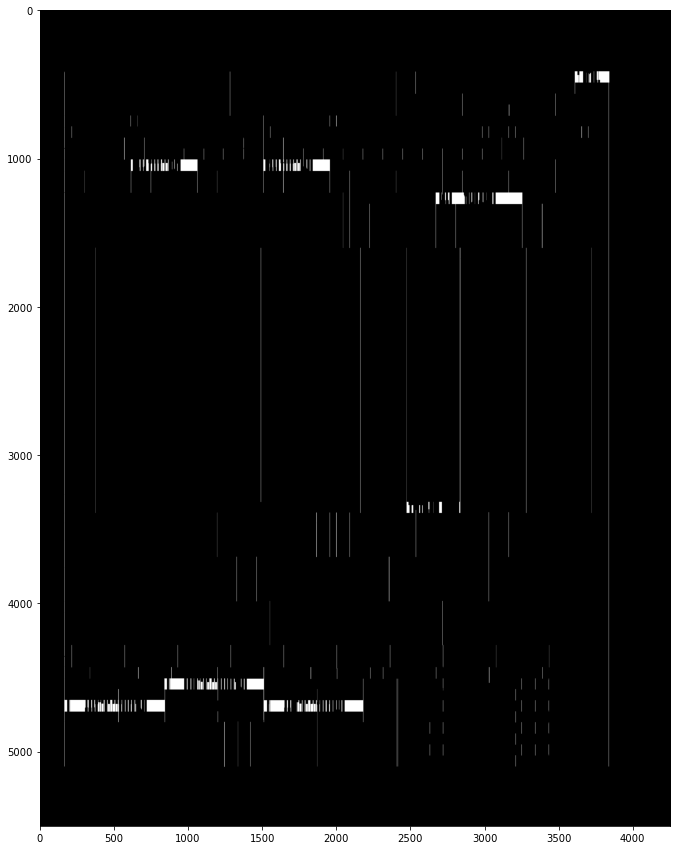

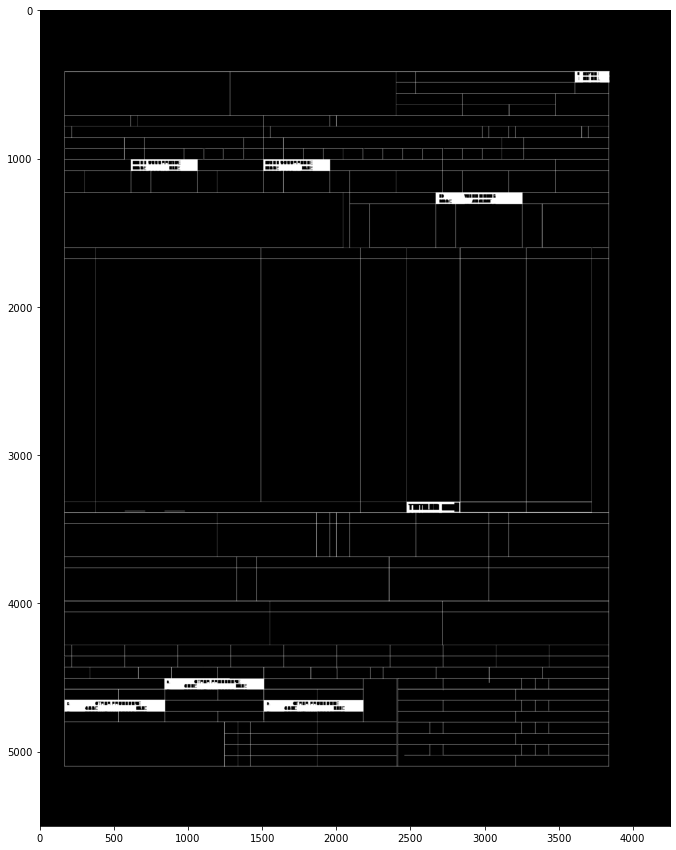

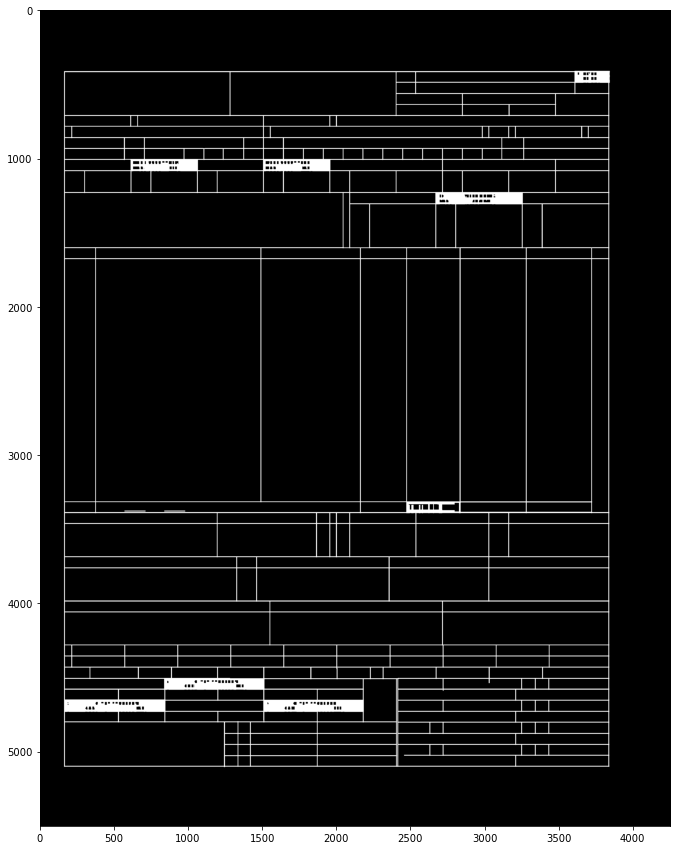

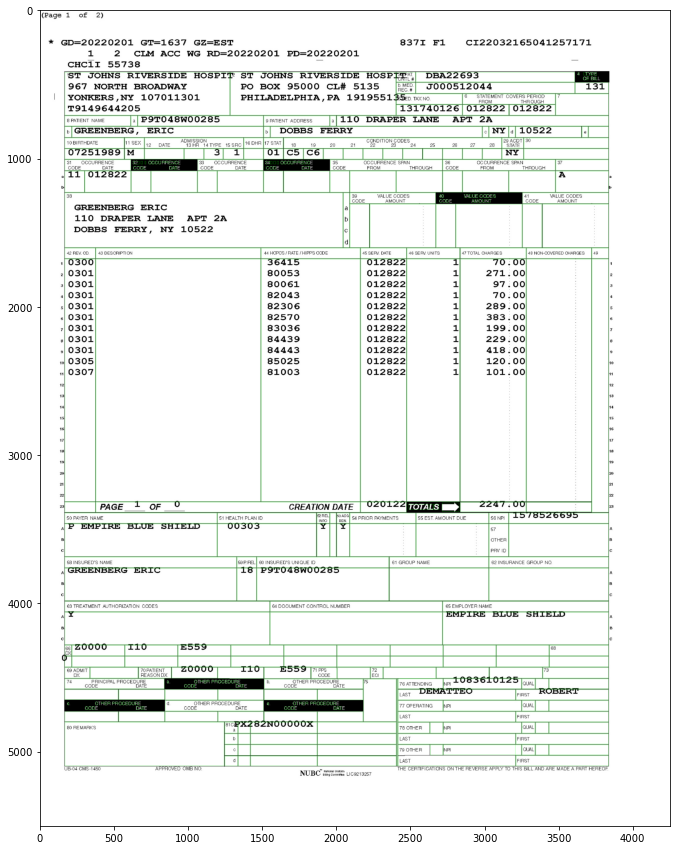

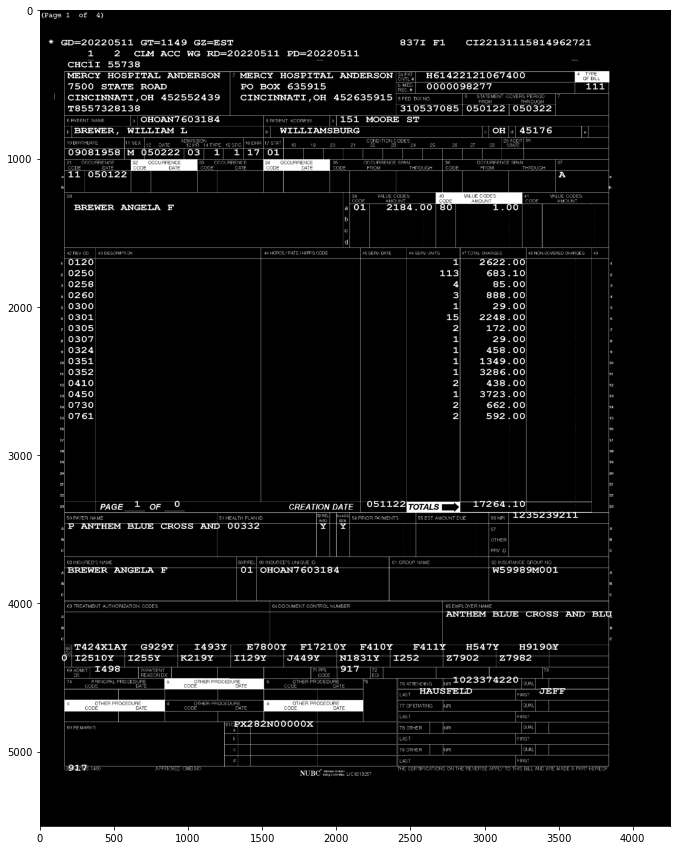

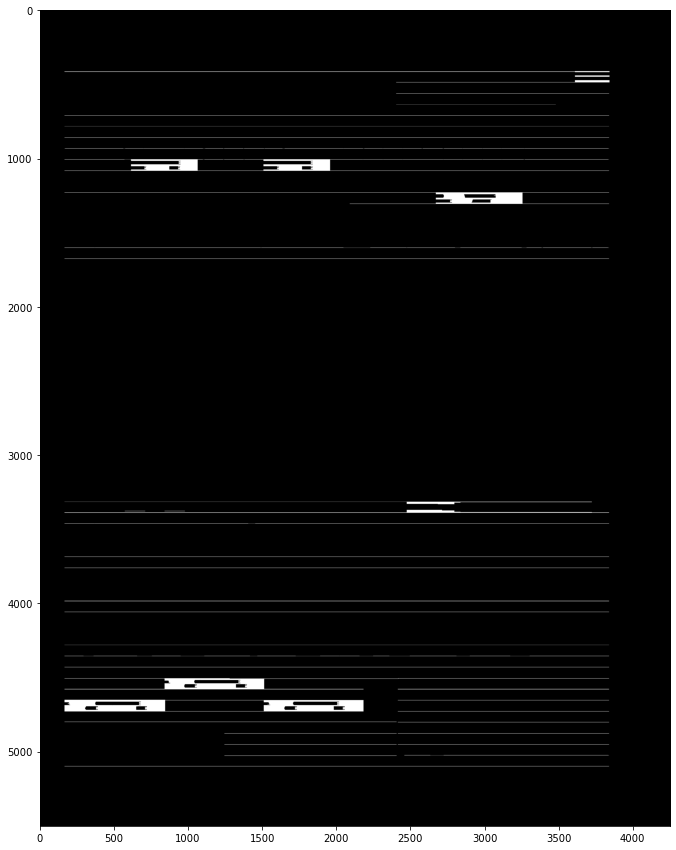

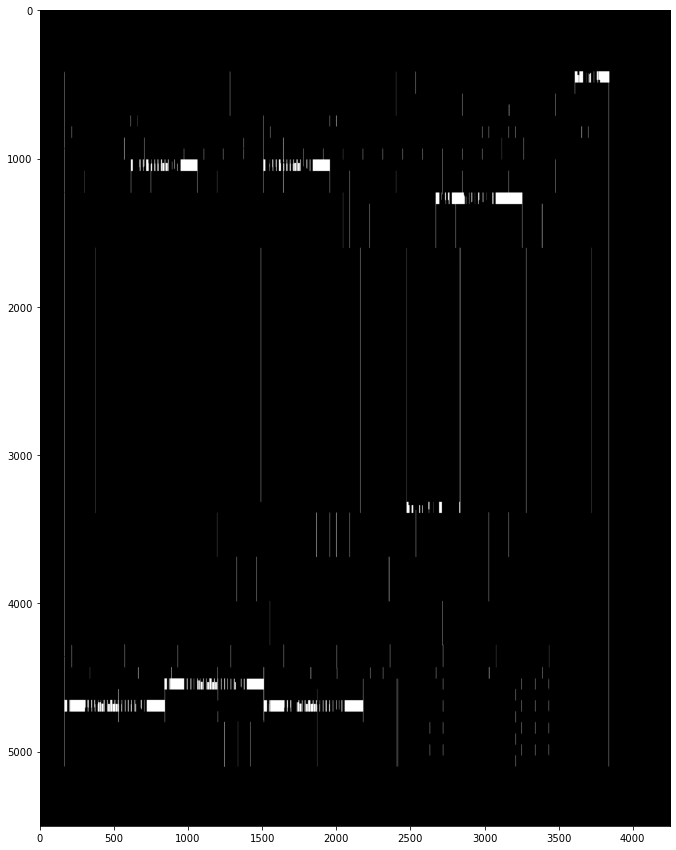

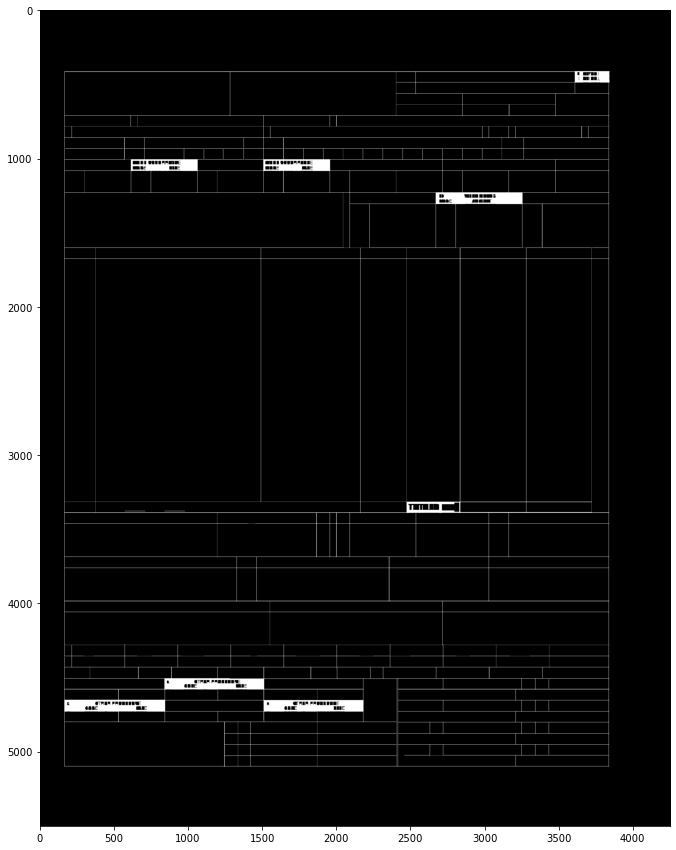

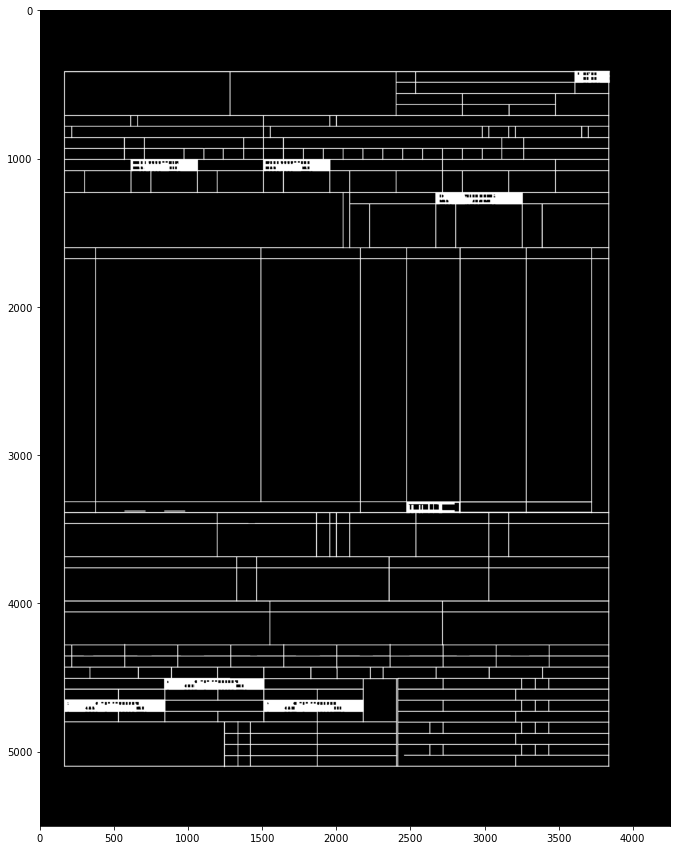

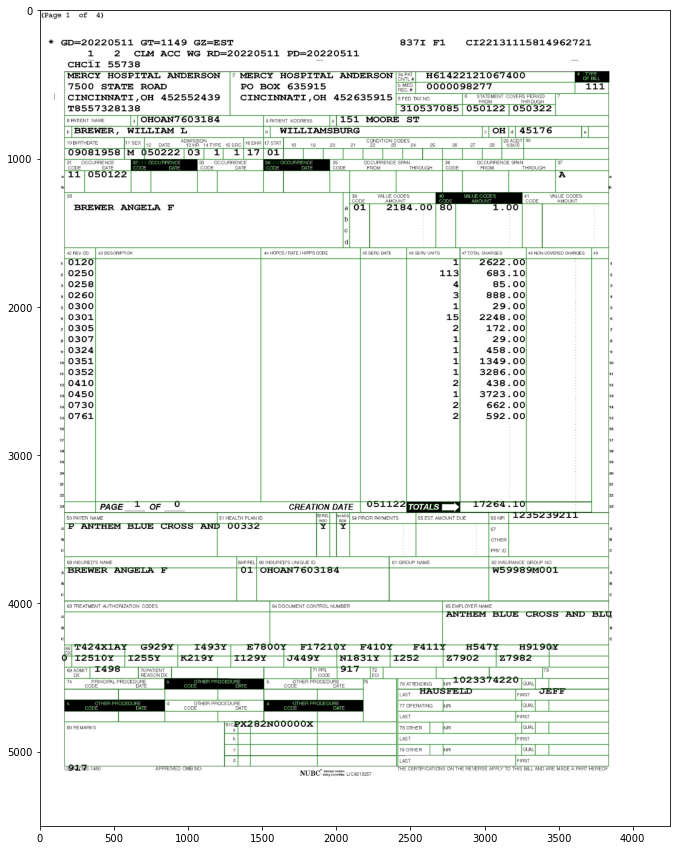

In [21]:
for i in image_path:
    image=cv2.imread(i)
    gray_scale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    th1,img_bin = cv2.threshold(gray_scale,100,255,cv2.THRESH_BINARY)
    img_bin=~img_bin
    if plot_flag:
        plot(img_bin,'gray')
    if save_output:
        cv2.imwrite(os.path.join(out_folder,f'bin_{image_path}'),img_bin)
    kernal_h = np.ones((1,100), np.uint8)
    kernal_v = np.ones((50,1), np.uint8)
    img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)
    if plot_flag:
        plot(img_bin_h,'gray')
    if save_output:
        cv2.imwrite(os.path.join(out_folder,f'hor_{image_path}'),img_bin_h)
    img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)
    if plot_flag:
        plot(img_bin_v,'gray')
    if save_output:
        cv2.imwrite(os.path.join(out_folder,f'ver_{image_path}'),img_bin_v)

    img_bin_final=img_bin_h|img_bin_v
    if plot_flag:
        plot(img_bin_final,'gray')
    if save_output:
        cv2.imwrite(os.path.join(out_folder,f'merge_{image_path}'),img_bin_final)

    final_kernel = np.ones((5,5), np.uint8)
    img_bin_final=cv2.dilate(img_bin_final,final_kernel,iterations=1)
    if plot_flag:
        plot(img_bin_final,'gray')
    if save_output:
        cv2.imwrite(os.path.join(out_folder,f'final_bin_{image_path}'),img_bin_final)

    ret, labels, stats,centroids = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

    ### 1 and 0 and the background and residue connected components whihc we do not require
    box=[]
    for x,y,w,h,area in stats[2:]:
    #     cv2.putText(image,'box',(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0,255,0), 2)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),1)
        box.append([x,y,w,h])
    if plot_flag:
        plot(image)
#     if save_output:
#         cv2.imwrite(os.path.join(out_folder,f'output_{i}'),image)
    img=[]
    for x,y,w,h,area in stats[2:]:
        img.append(image[y:y+h,x:x+w])
    import easyocr
    reader = easyocr.Reader(['en'])
    
    revcode= getRevCode(156)
    servdate= getServDate(159)
    servunits= getServUnits(160)
    totcharges= getTotalCharges(161)
    HCPCcodes= getHCPCCodes(158)  
    sex = getGender(47)
    name = getName(29)
    dob = getDOB(46)
    pro_add = ProvAdd(1)
    occu_codes = getOcc([106,114])
    src=getSRC(51)
    dishours=getDisHours(52)
    addhours=getAddHours(49)
    modifier=getModifier(158)
    Dict[name] = {}
    Dict[name]={'SRC Code': src,'Rev. Code': revcode,'Addmission Hours':addhours,'Discharge Hours':dishours,
        'Serv. Date':servdate,'Serv. Units': servunits,
        'HCPC Codes': HCPCcodes,'Modifiers': modifier,'Total Charges': totcharges,'Sex': sex,'Date Of Birth': dob,
        'Provider Address': pro_add,'Occurence Code':occu_codes}
    

In [22]:
Dict

{'PRESKE JUDITH E': {'SRC Code': ['1'],
  'Rev. Code': ['0250', '0305', '0351', '0352', '0450'],
  'Addmission Hours': [],
  'Discharge Hours': [],
  'Serv. Date': ['011521', '011521', '011521', '011521', '011521'],
  'Serv. Units': ['2', '1', '1', '1', '1'],
  'HCPC Codes': ['85610', '70450', '72125', '99284'],
  'Modifiers': ['25'],
  'Total Charges': ['50', '29', '00', '1187', '00', '1518', '00', '1842 : 00'],
  'Sex': ['F'],
  'Date Of Birth': ['10241960'],
  'Provider Address': 'DEACONESS HOSPITAL PO BOX 152 EVANSVILLE IN 477010152',
  'Occurence Code': [['05'], ['A1'], [], []]},
 'GREENBERG 1 ERIC': {'SRC Code': ['1'],
  'Rev. Code': ['0300',
   '0301',
   '0301',
   '0301',
   '0301',
   '0301',
   '0301',
   '0301',
   '0301',
   '0305',
   '0307'],
  'Addmission Hours': [],
  'Discharge Hours': [],
  'Serv. Date': ['012822',
   '012822',
   '012822',
   '012822',
   '012822',
   '012822',
   '012822',
   '012822',
   '012822',
   '012822',
   '012822'],
  'Serv. Units': ['1', 